<a href="https://colab.research.google.com/github/aroka007/Deep-Learning/blob/main/covid_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 Recurrent Neural Network

> Indented block


##Adhiraj Roka

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error


### Importing the  dataset

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
#total= 265 observations 10/12/2020
print(covid)
#Train-1st(90%)
train_size= int(len(covid)*.9)
test_size= len(covid)-train_size

print(train_size)
print(test_size)
train= covid.iloc[0:train_size,1:2].values

#Test- last (10%)

test=covid.iloc[train_size:len(covid),1:2].values
# print(train)
# print(test)

           date    cases  deaths
0    2020-01-21        1       0
1    2020-01-22        1       0
2    2020-01-23        1       0
3    2020-01-24        2       0
4    2020-01-25        3       0
..          ...      ...     ...
261  2020-10-08  7639252  212678
262  2020-10-09  7698203  213593
263  2020-10-10  7749789  214185
264  2020-10-11  7794555  214604
265  2020-10-12  7840482  214955

[266 rows x 3 columns]
239
27


### Feature Scaling

In [ ]:
#Apply normalization for LSTM
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)

In [ ]:
print(training_set_scaled)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.51187213e-07]
 [3.02374425e-07]
 [6.04748851e-07]
 [6.04748851e-07]
 [6.04748851e-07]
 [6.04748851e-07]
 [7.55936064e-07]
 [9.07123276e-07]
 [1.05831049e-06]
 [1.51187213e-06]
 [1.51187213e-06]
 [1.51187213e-06]
 [1.66305934e-06]
 [1.66305934e-06]
 [1.66305934e-06]
 [1.66305934e-06]
 [1.66305934e-06]
 [1.81424655e-06]
 [1.81424655e-06]
 [1.96543377e-06]
 [2.11662098e-06]
 [2.11662098e-06]
 [2.11662098e-06]
 [2.11662098e-06]
 [3.62849310e-06]
 [3.62849310e-06]
 [3.62849310e-06]
 [3.93086753e-06]
 [4.38442917e-06]
 [4.38442917e-06]
 [4.38442917e-06]
 [6.34986293e-06]
 [6.65223736e-06]
 [8.92004555e-06]
 [8.92004555e-06]
 [9.67598161e-06]
 [1.04319177e-05]
 [1.31532875e-05]
 [1.55722829e-05]
 [1.87472144e-05]
 [2.41899540e-05]
 [3.43194973e-05]
 [4.68680359e-05]
 [6.45569398e-05]
 [8.25482181e-05]
 [1.12936848e-04]
 [1.53757395e-04]
 [1.90798262e-04]
 [2.52029084e-04]
 [3.36089174e-04]
 [4.37989355e-04]
 [5.44122779e-04]
 [6.812495

### Creating a data structure with 30 timesteps and 1 output



### Training data

In [ ]:
X_train = []
y_train = []
for i in range(30, train_size):##train size is 239 here 
    X_train.append(training_set_scaled[i-30:i, 0]) #0-30,1-31 ##
    y_train.append(training_set_scaled[i, 0]) #predict t+1
X_train, y_train = np.array(X_train), np.array(y_train)

###Testing data

In [ ]:
# print(X_train) 
# print(y_train)
covid_cases=covid["cases"]
covid_cases

#len(test)

0            1
1            1
2            1
3            2
4            3
        ...   
261    7639252
262    7698203
263    7749789
264    7794555
265    7840482
Name: cases, Length: 266, dtype: int64

In [ ]:
inputs= covid_cases[len(covid_cases)-len(test)-30:].values ##$$$$##
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test= []
for i in range(30,57): #30+27=57
    X_test.append(inputs[i-30:i, 0]) ##
    y_test.append(inputs[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)


### Reshaping

In [ ]:
X_train = np.reshape( X_train, (X_train.shape[0], X_train.shape[1], 1)) #x_train.shape is number of row an dcolumns, 1 in last is predictor

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# print(X_train)
# print(X_test)

## Building and Training the RNN

#Layers 

In [ ]:
tf.random.set_seed(123)

#Initialize
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1))) #units is hidden numbers/neurons
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

#Output
regressor.add(Dense(units = 1))

#Compile and Fit
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,
              validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 2s 228ms/step - loss: 0.1346 - val_loss: 0.0898
Epoch 2/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0310 - val_loss: 0.0876
Epoch 3/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0102 - val_loss: 0.0308
Epoch 4/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0062 - val_loss: 0.0096
Epoch 5/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 6/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 7/100
7/7 [==============================] - 0s 61ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 8/100
7/7 [==============================] - 0s 60ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 9/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0026 - val_loss: 0.0054
Epoch 10/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0029 - val_loss: 9.4296e-04
Epoch 11/100
7

for 60 neurons per layer:
loss: 0.0014 - val_loss: 0.0072, timestep=7

loss: 0.0014 - val_loss: 0.0106, timestep=15

loss: 0.0016 - val_loss: 0.0011, timestep=30 ---****go with this****

loss: 0.0017 - val_loss: 0.0034, timestep=60

*not so good for lower neurons..
eg.
loss: 0.0024 - val_loss: 0.005, timestep=30* w/ for 40 units l


##Making the predictions 

In [ ]:
#Predict and inverse transform
predicted_cases_train = regressor.predict(X_train)
predicted_cases_train = sc.inverse_transform(predicted_cases_train)

predicted_cases_test= regressor.predict(X_test)
predicted_cases_test=sc.inverse_transform(predicted_cases_test)

train_y= sc.inverse_transform(y_train.reshape(-1,1))#reshape them expect 2d
test_y= sc.inverse_transform(y_test.reshape(-1,1))


print(math.sqrt(mean_squared_error(train_y, predicted_cases_train)))#train rmse
print(math.sqrt(mean_squared_error(test_y, predicted_cases_test)))#test rmse


predicted_cases_test

154784.32420471034
215448.13029953363


array([[6777990.5],
       [6803708.5],
       [6829029. ],
       [6854022. ],
       [6878755. ],
       [6903278. ],
       [6927664. ],
       [6951983.5],
       [6976241.5],
       [7000458. ],
       [7024647.5],
       [7048833. ],
       [7073010. ],
       [7097165.5],
       [7121280.5],
       [7145312. ],
       [7169213. ],
       [7192997.5],
       [7216643.5],
       [7240140.5],
       [7263490.5],
       [7286694.5],
       [7309744. ],
       [7332642. ],
       [7355411. ],
       [7378091. ],
       [7400696.5]], dtype=float32)

The unnormalized root mean square error of the final model for:

training= 154784.32420471034

test= 215448.13029953363

### Visualising the results

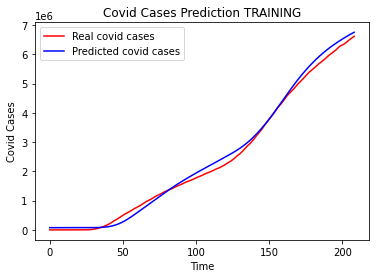

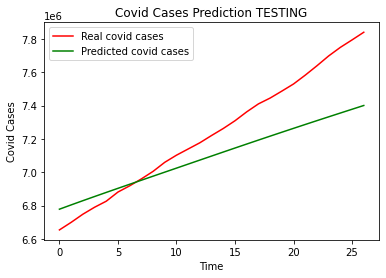

In [ ]:
plt.plot(train_y, color = 'red', label = 'Real covid cases')
plt.plot(predicted_cases_train, color = 'blue', label = 'Predicted covid cases')
plt.title('Covid Cases Prediction TRAINING')
plt.xlabel('Time')
plt.ylabel('Covid Cases')
plt.legend()
plt.show()


plt.plot(test_y, color = 'red', label = 'Real covid cases')
plt.plot(predicted_cases_test, color = 'green', label = 'Predicted covid cases')
plt.title('Covid Cases Prediction TESTING')
plt.xlabel('Time')
plt.ylabel('Covid Cases')
plt.legend()
plt.show()




```
# Model lacks behind for testing predictions. It follows that linear trend though.

For training predictions, manages well enough to follow upward or downward trend.
```



#BONUS:

In [ ]:
future_data= covid["cases"].values
future_data = future_data.reshape((-1,1))
future_data= sc.transform(future_data)

def predict(num_prediction, model):
    prediction_list = future_data[-29:]
    
    for _ in range(num_prediction):
        x = prediction_list[-29:]
        x = x.reshape((1, 29, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[29-1:]
        
    return prediction_list

num_prediction = 80 #days left in the year as of 10/12
forecast = predict(num_prediction, regressor)
forecast=forecast.reshape((-1,1))
forecast= sc.inverse_transform(forecast)
#len(forecast)
print(forecast) #doesn't look right

[[7840482.        ]
 [7412238.38059425]
 [7434208.0192647 ]
 [7454726.05169058]
 [7473166.41847038]
 [7489138.81808805]
 [7502501.32271957]
 [7513340.66603518]
 [7521863.4318676 ]
 [7528330.60971546]
 [7533100.96157837]
 [7536496.1905241 ]
 [7538810.40254354]
 [7540287.24040127]
 [7541183.75115633]
 [7541681.28702831]
 [7541913.10247421]
 [7541965.14267635]
 [7541913.10247421]
 [7541790.09836006]
 [7541620.57345915]
 [7541439.22123957]
 [7541275.21575403]
 [7541119.88363552]
 [7540967.70546865]
 [7540802.91149521]
 [7540620.77078772]
 [7540426.80276155]
 [7540238.35415077]
 [7540068.82924986]
 [7539916.65108299]
 [7540646.79088879]
 [7541198.73242664]
 [7541606.38067675]
 [7541898.1212039 ]
 [7542103.12806082]
 [7542243.47890902]
 [7542342.82838583]
 [7542410.6383462 ]
 [7542465.04401207]
 [7542509.98782301]
 [7542549.41221857]
 [7542588.83661413]
 [7542633.78042507]
 [7542677.14726019]
 [7542721.30258322]
 [7542769.4003458 ]
 [7542818.2865963 ]
 [7542865.59587097]
 [7542912.90514565]


From the fitted model, for future prediction of covid cases, we can expect to have about 7543634 cummulative cases at the end of the year, which looks uncertain here. There seems to be some noise which is amplified to a great extent

In [ ]:
!jupyter nbconvert --to html a3__AR_.ipynb

[NbConvertApp] Converting notebook a3__AR_.ipynb to html
[NbConvertApp] Writing 370681 bytes to a3__AR_.html
